# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan dalam proyek ini yaitu [Lung Cancer](https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer?resource=download) yang diunduh dari *Kaggle*. Dataset ini terdiri dari 308 *rows* dan 16 *columns*.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [2]:
from google.colab import files
files.upload()

Saving lung_cancer_raw.csv to lung_cancer_raw.csv


{'lung_cancer_raw.csv': b'GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE ,ALLERGY ,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER\r\nM,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES\r\nM,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES\r\nF,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO\r\nM,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO\r\nF,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO\r\nF,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES\r\nM,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES\r\nF,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES\r\nF,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO\r\nM,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES\r\nF,61,2,2,2,2,2,2,1,2,1,2,2,2,1,YES\r\nM,72,1,1,1,1,2,2,2,2,2,2,2,1,2,YES\r\nF,60,2,1,1,1,1,2,1,1,1,1,2,1,1,NO\r\nM,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES\r\nM,69,2,1,1,1,1,1,2,2,2,2,1,1,2,NO\r\nF,48,1,2,2,2,2,2,2,2,1,2,2,2,1,YES\r\nM,75,2,1,1,1,2,1,2,2,2,2,2,1,2,YES\r\nM,57,2,2,2,2,2,1,1,1,2,1,1,2,2,YES\r\nF,68,2,2,2,2,2,2,1,1,1,2,2,1,1,YES\r\nF,61,1,1,1,1,2,2,1,1,1,1,2,1,1,NO\r\nF,44,2,2,2,2,2,2,1,1,1,1,2,

In [3]:
df = pd.read_csv('/content/lung_cancer_raw.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah baris dan kolom: (309, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
def standardize_column_names(df):
    """
    Standardizes DataFrame column names by:
    - Replacing spaces and hyphens (-) with underscores (_),
    - Removing non-alphanumeric characters (excluding underscores),
    - Converting to lowercase.
    """
    updated_names = []
    for name in df.columns:
        name = name.strip()
        name = re.sub(r'[\s\-]+', '_', name)
        name = re.sub(r'[^\w]', '', name)
        name = name.lower()
        updated_names.append(name)

    df.columns = updated_names
    return df

df = standardize_column_names(df)

print(df.columns)

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')


In [8]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Attribute information:
1. `Gender`: M(male), F(female)
2. `Age`: Age of the patient
3. `Smoking`: YES = 2, NO = 1.
4. `Yellow fingers`: YES = 2, NO = 1.
5. `Anxiety`: YES = 2, NO = 1.
6. `Peer_pressure`: YES = 2, NO = 1.
7. `Chronic Disease`: YES = 2, NO = 1.
8. `Fatigue`: YES = 2, NO = 1.
9. `Allergy`: YES = 2, NO = 1.
10. `Wheezing`: YES = 2, NO = 1.
11. `Alcohol`: YES = 2, NO = 1.
12. `Coughing`: YES = 2, NO = 1.
13. `Shortness of Breath`: YES = 2, NO = 1.
14. `Swallowing Difficulty`: YES = 2, NO = 1.
15. `Chest pain`: YES = 2, NO = 1.
16. `Lung Cancer`: YES, NO.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
df.describe(include='all')

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


Cek missing value

In [10]:
df.isnull().sum()

,0
gender,0
age,0
smoking,0
yellow_fingers,0
anxiety,0
peer_pressure,0
chronic_disease,0
fatigue,0
allergy,0
wheezing,0


Tidak terdapat missing value.

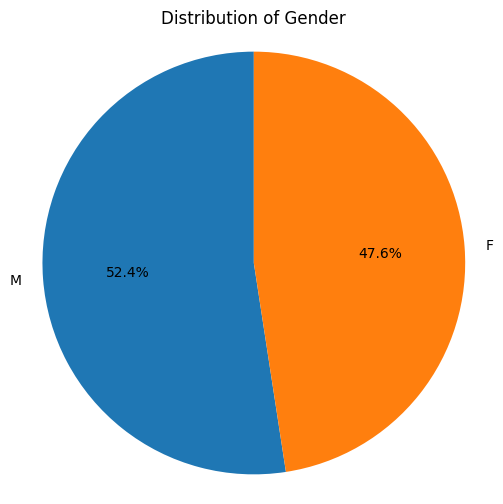

In [11]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

/tmp/ipython-input-30-1424695506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='lung_cancer', data=df, palette = 'deep')


Text(0.5, 1.0, 'Distribution of Lung Cancer')

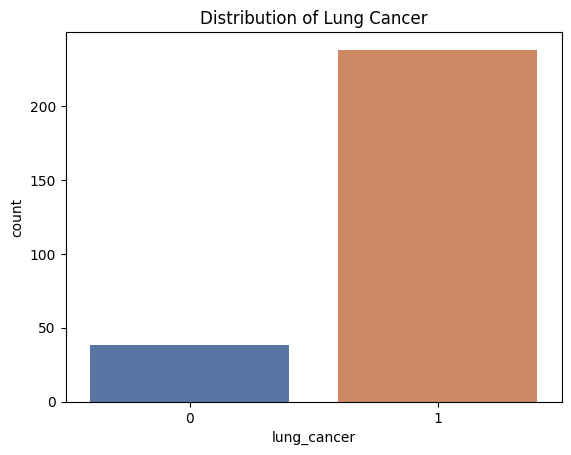

In [30]:
sns.countplot(x='lung_cancer', data=df, palette = 'deep')
plt.title('Distribution of Lung Cancer')

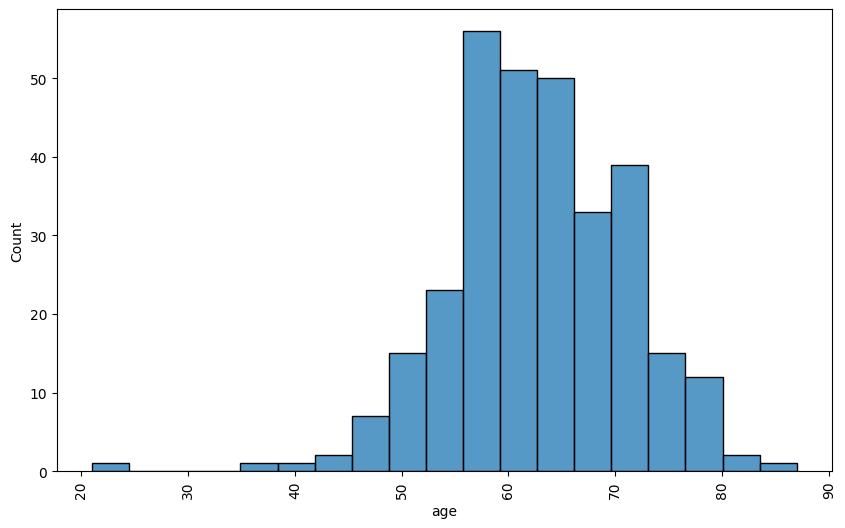

In [13]:
plt.figure(figsize = (10,6))
sns.histplot(df['age'])
plt.xticks(rotation = 90)
plt.show()

/tmp/ipython-input-14-2745265324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'deep')
/tmp/ipython-input-14-2745265324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'deep')
/tmp/ipython-input-14-2745265324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette = 'deep')
/tmp/ipython-input-14-2745265324.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

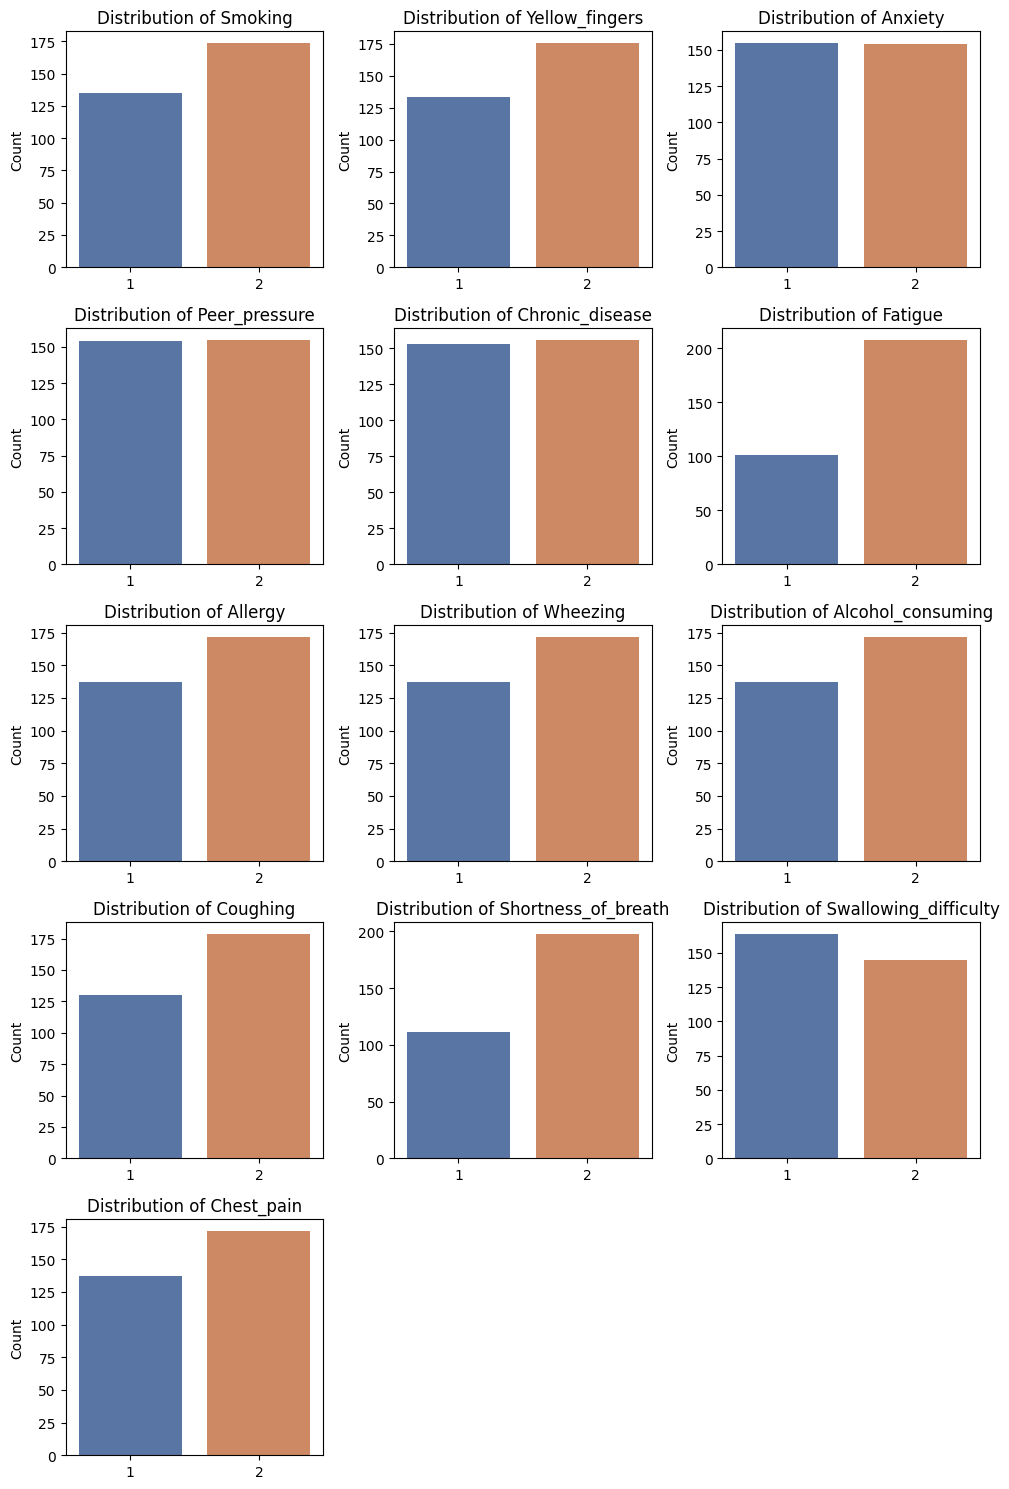

In [14]:
columns = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
           'chronic_disease', 'fatigue', 'allergy', 'wheezing',
           'alcohol_consuming', 'coughing', 'shortness_of_breath',
           'swallowing_difficulty', 'chest_pain']

plt.figure(figsize=(10, 15))
for i, col in enumerate(columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=col, data=df, palette = 'deep')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-1904820639.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


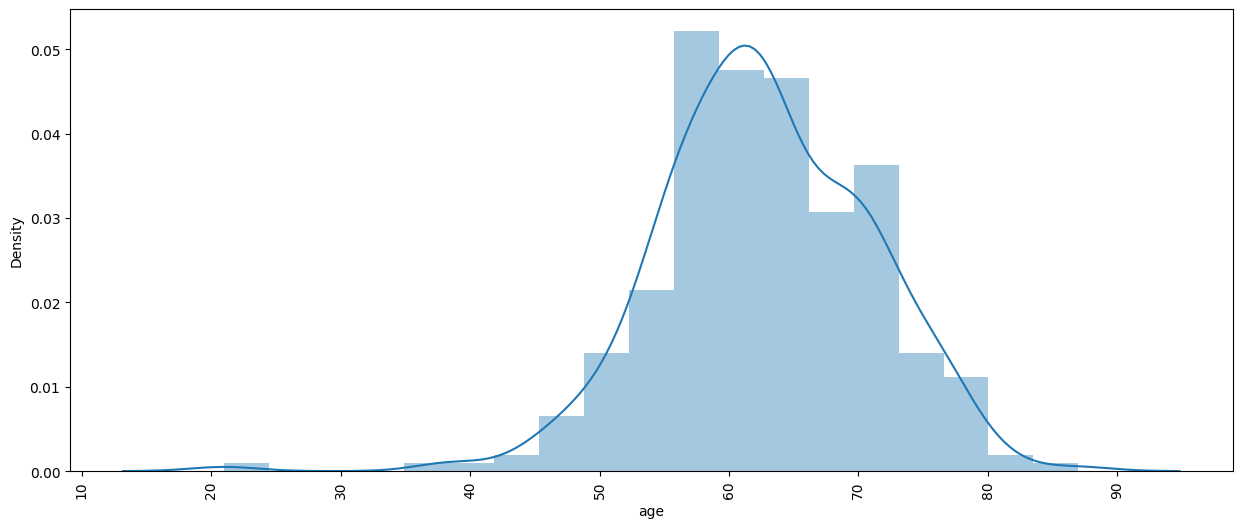

In [17]:
plt.figure(figsize=(15,6))
sns.distplot(df['age'])
plt.xticks(rotation = 90)
plt.show()

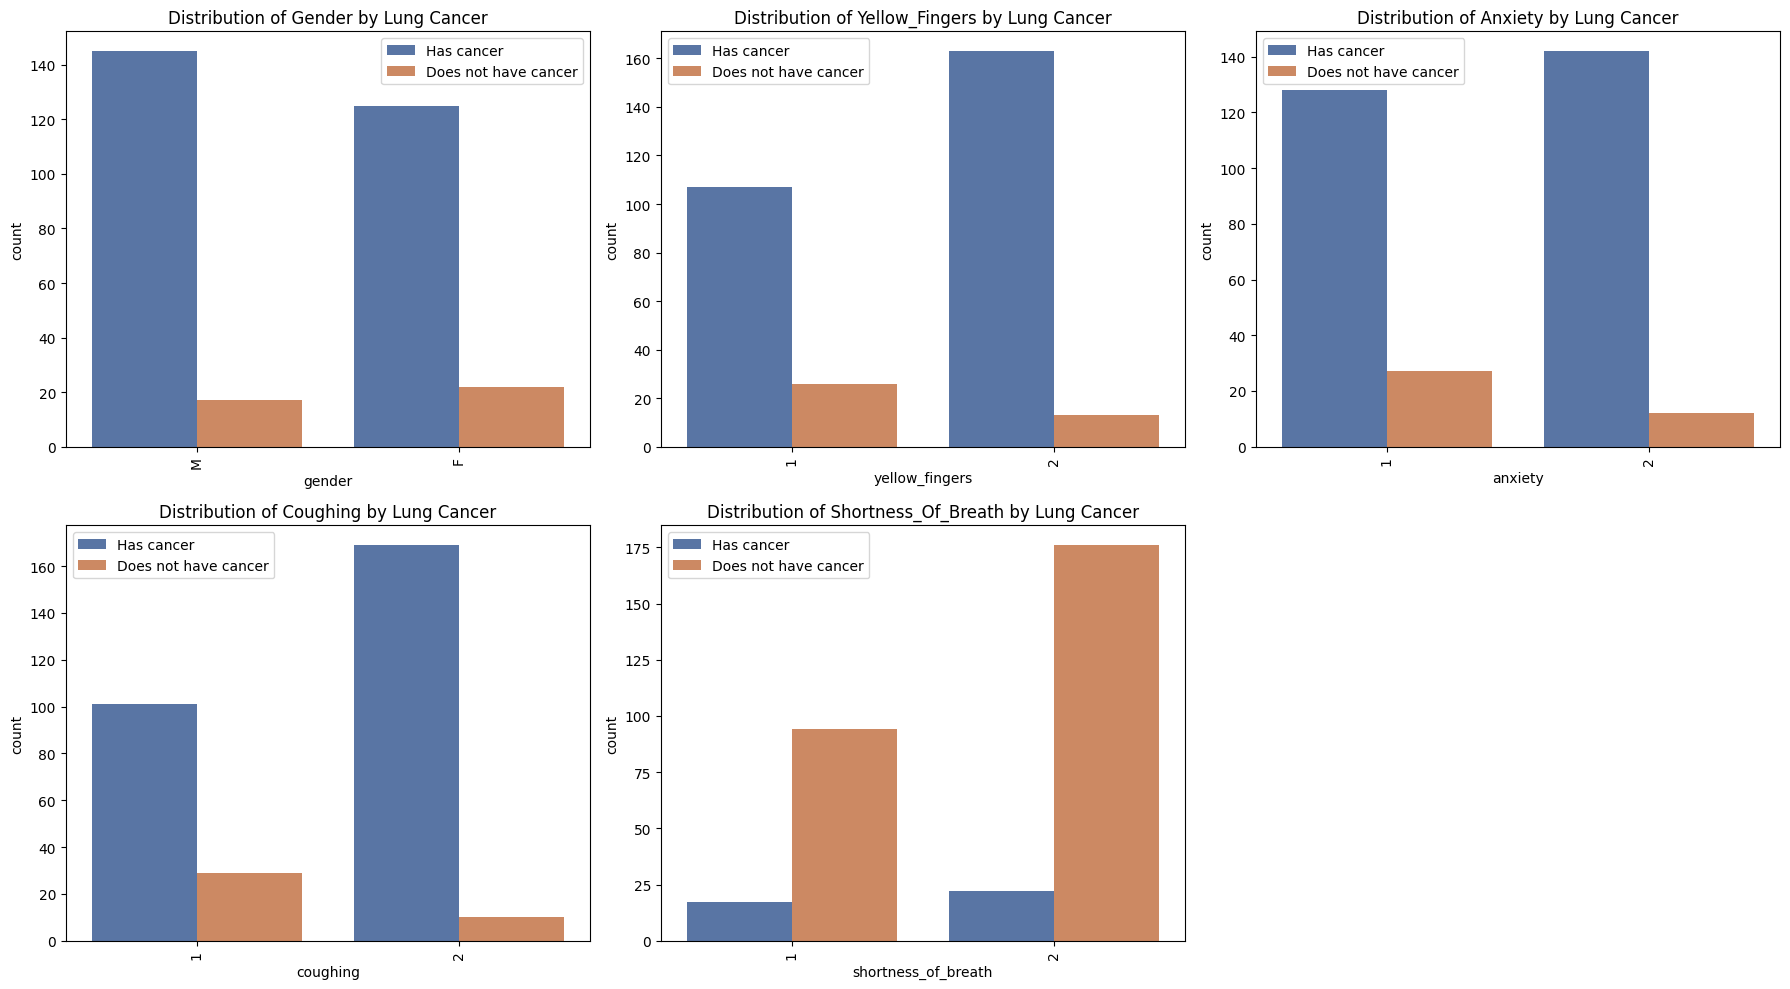

In [18]:
features = ['gender', 'yellow_fingers', 'anxiety', 'coughing', 'shortness_of_breath']

plt.figure(figsize=(18, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=df, hue='lung_cancer', palette='deep')
    plt.title(f'Distribution of {col.title()} by Lung Cancer')
    plt.xticks(rotation=90)
    plt.legend(["Has cancer", "Does not have cancer"])

# Rapikan tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

Melakukan encoding pada kolom `GENDER` dan `LUNG_CANCER`

In [20]:
df['lung_cancer'] = [1 if i == "YES" else 0 for i in df['lung_cancer']]
df['gender'] = [1 if i == "F" else 0 for i in df['gender']]

Membuat matriks korelasi dan visualisasi menggunakan heatmap

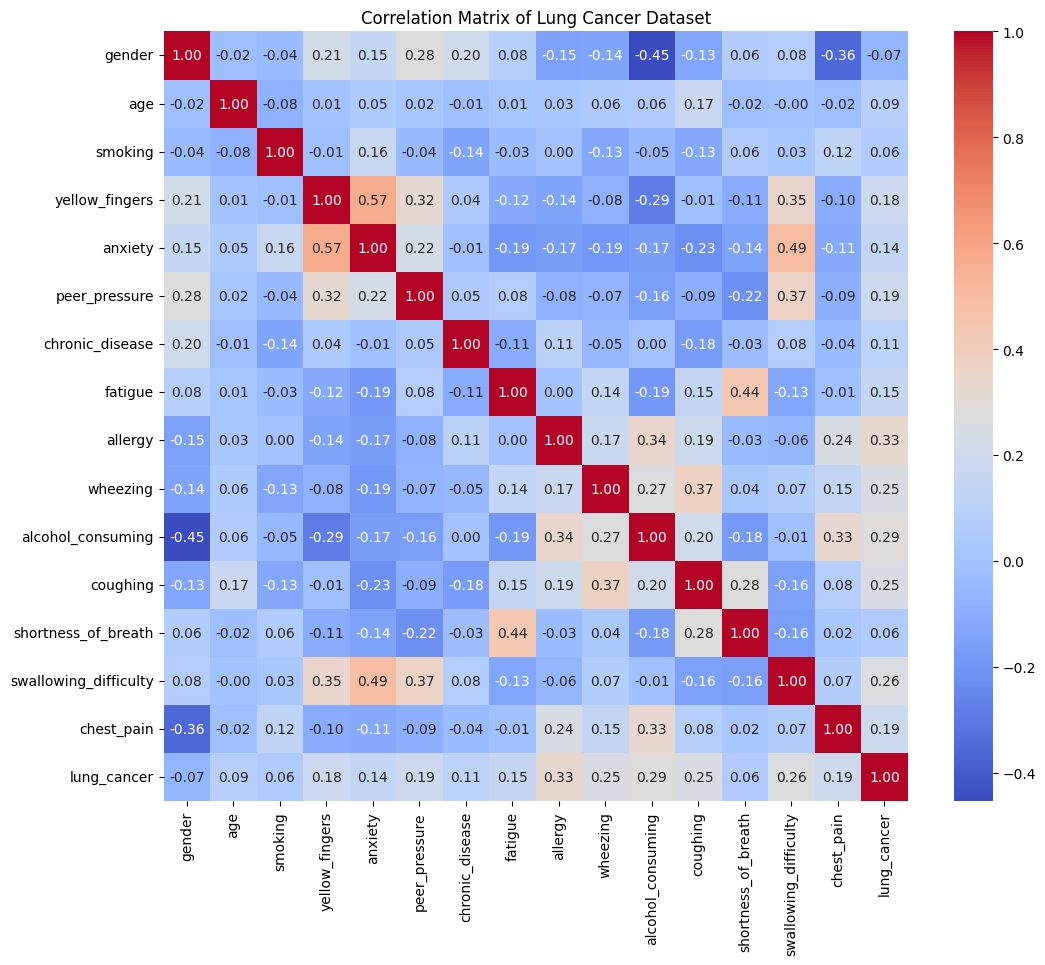

In [21]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lung Cancer Dataset')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Cek data duplikat

In [22]:
duplicates = df.duplicated().sum()
print(f"\nTotal jumlah baris duplikat: {duplicates}")


Total jumlah baris duplikat: 33


Menghapus data duplikat

In [23]:
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print(f"\nTotal jumlah baris duplikat: {duplicates.sum()}")


Total jumlah baris duplikat: 0


Mapping kolom biner dari 1:0 dan 2:1

In [24]:
binary_columns = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
                  'chronic_disease', 'fatigue', 'allergy', 'wheezing',
                  'alcohol_consuming', 'coughing', 'shortness_of_breath',
                  'swallowing_difficulty', 'chest_pain']


df[binary_columns] = df[binary_columns].replace({1: 0, 2: 1})

/tmp/ipython-input-24-4162852909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_columns] = df[binary_columns].replace({1: 0, 2: 1})


In [25]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Menyimpan data ke csv

In [27]:
df.to_csv('lung_cancer_preprocessing.csv', index=False)